In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('ppg.csv')

In [4]:
print(dataset.shape)
print(dataset.head(5))

(218, 4)
   161  89  97  Stage 2 hypertension
0  160  93  76  Stage 2 hypertension
1  101  71  79                Normal
2  136  93  87       Prehypertension
3  123  73  73       Prehypertension
4  124  62  70       Prehypertension


In [5]:
X = dataset.iloc[:, :-1].values
X

array([[160,  93,  76],
       [101,  71,  79],
       [136,  93,  87],
       [123,  73,  73],
       [124,  62,  70],
       [126,  78,  84],
       [108,  73,  84],
       [ 89,  42,  63],
       [ 98,  56,  69],
       [124,  85,  94],
       [137,  80,  78],
       [117,  70,  75],
       [118,  71,  84],
       [107,  63,  84],
       [178,  86,  80],
       [124,  75,  93],
       [ 95,  57,  76],
       [114,  65,  79],
       [161,  89,  72],
       [125,  75,  82],
       [115,  64, 103],
       [129,  81,  91],
       [173,  90,  73],
       [182, 102,  81],
       [110,  64,  66],
       [139,  85,  80],
       [153,  72,  85],
       [150,  96,  87],
       [116,  56,  72],
       [103,  65,  66],
       [141,  72,  87],
       [160,  77,  59],
       [133,  76,  80],
       [142,  90,  65],
       [154,  88,  80],
       [173, 107,  93],
       [111,  62,  73],
       [107,  63,  84],
       [128,  66,  71],
       [131,  88,  69],
       [114,  75, 106],
       [139,  84

In [6]:
Y = dataset.iloc[:, -1].values
Y

array(['Stage 2 hypertension', 'Normal', 'Prehypertension',
       'Prehypertension', 'Prehypertension', 'Prehypertension', 'Normal',
       'Normal', 'Normal', 'Prehypertension', 'Prehypertension', 'Normal',
       'Normal', 'Normal', 'Stage 2 hypertension', 'Prehypertension',
       'Normal', 'Normal', 'Stage 2 hypertension', 'Prehypertension',
       'Normal', 'Prehypertension', 'Stage 2 hypertension',
       'Stage 2 hypertension', 'Normal', 'Prehypertension',
       'Stage 1 hypertension', 'Stage 1 hypertension', 'Normal', 'Normal',
       'Stage 1 hypertension', 'Stage 2 hypertension', 'Prehypertension',
       'Stage 1 hypertension', 'Stage 1 hypertension',
       'Stage 2 hypertension', 'Normal', 'Normal', 'Prehypertension',
       'Prehypertension', 'Normal', 'Prehypertension', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Prehypertension', 'Normal',
       'Normal', 'Normal', 'Stage 2 hypertension', 'Normal',
       'Stage 1 hypertension', 'Stage 2 hypertension',


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1,random_state =0)

In [76]:
from sklearn.naive_bayes import GaussianNB
model_1 = GaussianNB()
model_1.fit(X_train, y_train)

#from sklearn.tree import DecisionTreeClassifier
#model_1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10, random_state = 0)
#model_1.fit(X_train,y_train)


GaussianNB()

In [85]:
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
model_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [86]:
from sklearn import svm
model_3 = svm.SVC(kernel="rbf") 
# model =svm.SVC(kernel="rbf")
model_3.fit(X_train,y_train)
svm.SVC()

SVC()

In [87]:
y_pred_1 = model_1.predict(X_test)

y_pred_2 = model_2.predict(X_test)

y_pred_3 = model_3.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model Naive Bayes: {0}%".format(accuracy_score(y_test, y_pred_1)*100))
from sklearn.metrics import accuracy_score
print("Accuracy of the Model KNN: {0}%".format(accuracy_score(y_test, y_pred_2)*100))
from sklearn.metrics import accuracy_score
print("Accuracy of the Model svm: {0}%".format(accuracy_score(y_test, y_pred_3)*100))

Accuracy of the Model Naive Bayes: 95.45454545454545%
Accuracy of the Model KNN: 81.81818181818183%
Accuracy of the Model svm: 81.81818181818183%


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred_1)
cm1 = confusion_matrix(y_test, y_pred_2)
cm2 = confusion_matrix(y_test, y_pred_3)
print("Confusion Matrix:Naive Bayes ")
print("confusion matrix", cm, "accuracy", accuracy_score(y_test,y_pred_1))
print(classification_report(y_test,y_pred_1))
print(".......................................................")
print("Confusion Matrix:knn ")
print("confusion matrix", cm1, "accuracy", accuracy_score(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))
print(".......................................................")
print("Confusion Matrix:LR ")
print("confusion matrix", cm2, "accuracy", accuracy_score(y_test,y_pred_3))
print(classification_report(y_test,y_pred_3))

Confusion Matrix:Naive Bayes 
confusion matrix [[ 3  0  0  0]
 [ 0 11  0  0]
 [ 0  0  3  0]
 [ 0  0  0  5]] accuracy 1.0
                      precision    recall  f1-score   support

              Normal       1.00      1.00      1.00         3
     Prehypertension       1.00      1.00      1.00        11
Stage 1 hypertension       1.00      1.00      1.00         3
Stage 2 hypertension       1.00      1.00      1.00         5

            accuracy                           1.00        22
           macro avg       1.00      1.00      1.00        22
        weighted avg       1.00      1.00      1.00        22

.......................................................
Confusion Matrix:knn 
confusion matrix [[ 3  0  0  0]
 [ 0 11  0  0]
 [ 0  1  2  0]
 [ 0  0  3  2]] accuracy 0.8181818181818182
                      precision    recall  f1-score   support

              Normal       1.00      1.00      1.00         3
     Prehypertension       0.92      1.00      0.96        11
Stage 1 h

In [66]:
aa=list(y_pred_1)  # predictions are in nd.array . i am converting them into list for my convenience
bb=list(y_pred_2)
cc=list(y_pred_3)

In [67]:
a=aa  # prediction of naive bayes
b=bb    # prediction of KNN
c=cc   # prediction of LR
d=[] # predicted output by ensemble classifier ( initially starting with a null list)
for i in range(len(a)):  
    testlist=[]
    testlist.append(a[i])
    testlist.append(b[i])
    testlist.append(c[i])
  #print(testlist)
################################ change it
    normal=testlist.count('Normal')
    prehy = testlist.count('Prehypertension')
    st1hy = testlist.count('Stage 1 hypertension')
    st2hy = testlist.count('Stage 2 hypertension')
    
    if normal> prehy and normal>st1hy and normal> st2hy:
        d.append('Normal')
    elif prehy> normal and prehy>st1hy and prehy> st2hy:
        d.append('Prehypertension')
    elif st1hy> normal and st1hy>prehy and st1hy> st2hy:
        d.append('Stage 1 hypertension')
    elif st2hy> normal and st2hy>st1hy and st2hy> prehy:
        d.append('Stage 2 hypertension')
    else:
        d.append(a[i])
    
    
  
 

print("predcted values:{0} ".format(d))

predcted values:['Prehypertension', 'Prehypertension', 'Prehypertension', 'Prehypertension', 'Stage 2 hypertension', 'Prehypertension', 'Stage 1 hypertension', 'Prehypertension', 'Stage 2 hypertension', 'Prehypertension', 'Normal', 'Stage 1 hypertension', 'Stage 1 hypertension', 'Stage 2 hypertension', 'Normal', 'Prehypertension', 'Prehypertension', 'Prehypertension', 'Normal', 'Stage 1 hypertension', 'Stage 1 hypertension', 'Prehypertension'] 


In [56]:
print("*******************report for ensemble model*****************")
cm4=confusion_matrix(list(y_test), d)


print("Confusion Matrix:ENSEMBLE MODEL ")
print("confusion matrix", cm4, "accuracy", accuracy_score(list(y_test), d))
print(classification_report(list(y_test), d))

*******************report for ensemble model*****************
Confusion Matrix:ENSEMBLE MODEL 
confusion matrix [[ 3  0  0  0]
 [ 0 11  0  0]
 [ 0  0  3  0]
 [ 0  0  3  2]] accuracy 0.8636363636363636
                      precision    recall  f1-score   support

              Normal       1.00      1.00      1.00         3
     Prehypertension       1.00      1.00      1.00        11
Stage 1 hypertension       0.50      1.00      0.67         3
Stage 2 hypertension       1.00      0.40      0.57         5

            accuracy                           0.86        22
           macro avg       0.88      0.85      0.81        22
        weighted avg       0.93      0.86      0.86        22



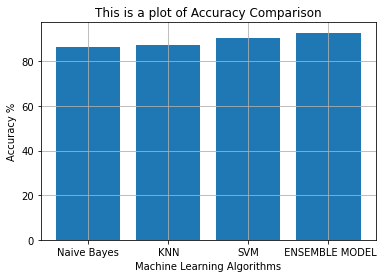

In [93]:
import matplotlib.pyplot as prithwi
prithwi.bar(["Naive Bayes","KNN", "SVM", " ENSEMBLE MODEL"],[86.57,87.57,90.57, 92.90])

prithwi.xlabel("Machine Learning Algorithms")
prithwi.ylabel("Accuracy %")
prithwi.title("This is a plot of Accuracy Comparison")
prithwi.grid()